<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/15_TFKeras_Image_Augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ïù¥ÎØ∏ÏßÄ Ï¶ùÍ∞ï Image Augmentation

- https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko

- Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûëÍ±∞ÎÇò Î™®Îç∏Ïù¥ Í≥ºÏ†ÅÌï©ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî Î∞©ÏãùÏù¥Îã§.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
# from tensorflow.keras import layers
# from tensorflow.keras.datasets import mnist
from tensorflow import keras

In [2]:
# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú

(train_ds, valid_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1.incompleteDXZZ3G',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
# ÌÅ¥ÎûòÏä§Ïùò Í∞úÏàòÎäî 5Í∞ú

num_classes = metadata.features['label'].num_classes
num_classes

5

In [5]:
# ÌÅ¥ÎûòÏä§Ïùò Ï¢ÖÎ•ò

get_label_name = metadata.features['label'].int2str
get_label_name

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=int64, num_classes=5)>

In [6]:
class_names = [get_label_name(n) for n in range(5)]
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

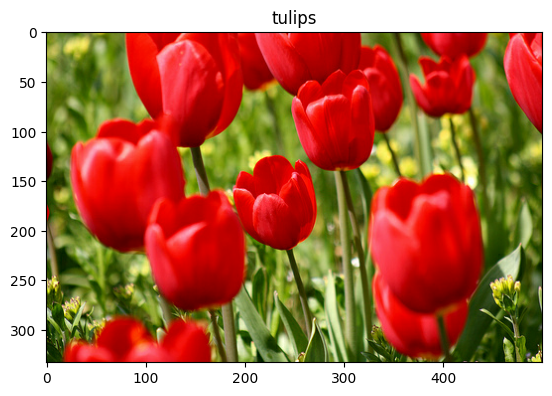

In [7]:
# Îç∞Ïù¥ÌÑ∞Ïùò ÏÉùÍ∏¥ Î™®Ïñë ÌôïÏù∏
# Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏ÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ•º Í≤ÄÏÉâÌïòÍ≥† Ïù¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÏàòÌñâ

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [8]:
# Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ÏôÄ ÎπÑÏú® Ï°∞Ï†à : Keras Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥ ÏÇ¨Ïö©

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
]) #--> Rescaling(1./127.5, offset=-1) ÏòµÏÖòÏúºÎ°ú ÏÇ¨Ïö©Ìï† ÏàòÎèÑ ÏûàÎã§.

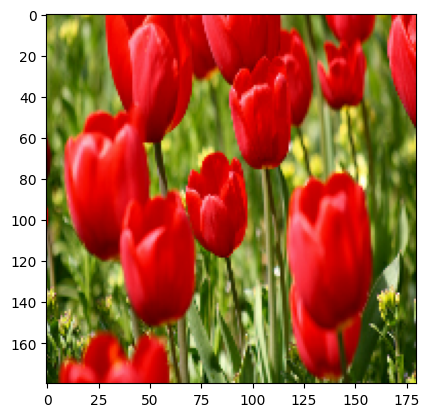

In [9]:
# Ï°∞Ï†à Í≤∞Í≥º ÌôïÏù∏

result = resize_and_rescale(image)
_ = plt.imshow(result)

In [10]:
# Scaling Í≤∞Í≥º pixel Î≤îÏúÑ ÌôïÏù∏

print("Min and Max pixel vlaues:", result.numpy().min(), result.numpy().max())

Min and Max pixel vlaues: 0.0 1.0


<br></br>

## - Î∞©Î≤ï1.

- Îç∞Ïù¥ÌÑ∞ ÌöåÏ†ÑÍ≥º Í¥ÄÎ†®Îêú Ï¶ùÍ∞ï

- `tf.keras.layers.RandomFlip` Î∞è `tf.keras.layers.RandomRotation`Í≥º Í∞ôÏùÄ Keras Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏóêÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

- `tf.keras.layers.RandomContrast`, `tf.keras.layers.RandomCrop`, `tf.keras.layers.RandomZoom` Îì±ÏùÑ Ìè¨Ìï®ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Îã§ÏñëÌïú Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Í∞Ä ÏûàÎã§.

In [11]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

### ‚óæ tf.extend_dims Ïó≠Ìï†

In [12]:
image, label = next(iter(train_ds))

In [13]:
image.shape

TensorShape([333, 500, 3])

In [14]:
# Add the image to a batch
image = tf.expand_dims(image, 0)
image.shape

TensorShape([1, 333, 500, 3])

In [15]:
# Add the image to a batch.
# image = tf.cast(tf.expand_dims(result, 0), tf.float32)

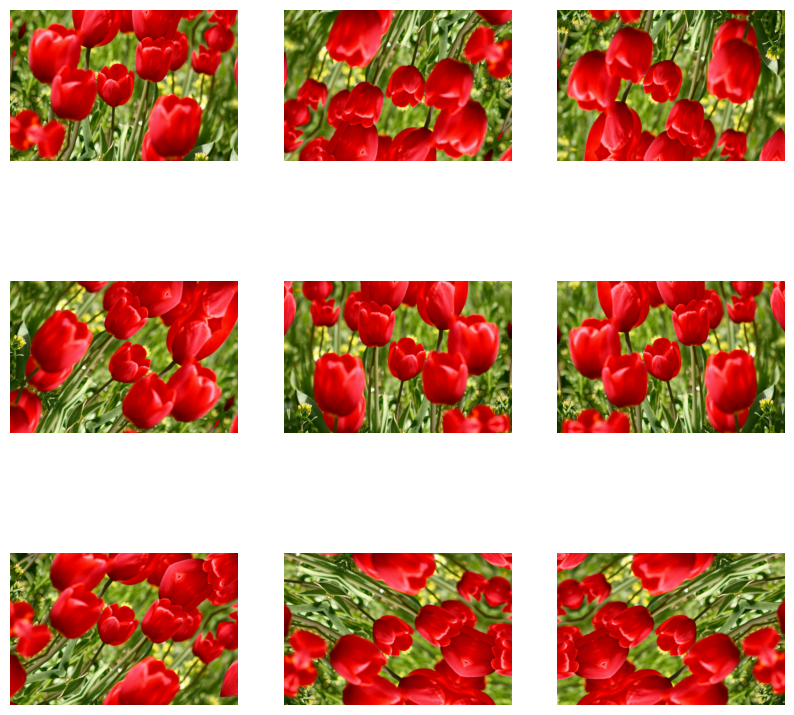

In [16]:
# ÌöåÏ†Ñ Ï¶ùÍ∞ï Í≤∞Í≥º ÌôïÏù∏

plt.figure(figsize=(10,10))
for i in range(9):
    augmented_img = data_augmentation(image)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmented_img[0])
    plt.axis("off")

<br></br>

## - Î∞©Î≤ï2. Keras Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥

> Keras Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú Îëê Í∞ÄÏßÄ ÏòµÏÖò (ÏÇ¨Ïö© Ïòà 2Í∞ÄÏßÄ)

- Ï§ëÏöîÌïú Ï†àÏ∂©ÏùÑ ÌÜµÌï¥ Ïù¥Îü¨Ìïú Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÏûàÎã§.

### ‚óæ ÏòµÏÖò 1.

> Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º Î™®Îç∏Ïùò ÏùºÎ∂ÄÎ°ú ÎßåÎìúÎäî Î∞©Î≤ï

- Ïù¥ Í≤ΩÏö∞ Ïú†ÏùòÌï¥Ïïº Ìï† Îëê Í∞ÄÏßÄ Ï§ëÏöîÌïú ÏÇ¨Ìï≠Ïù¥ ÏûàÎã§.

    1. Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÄ ÎÇòÎ®∏ÏßÄ Î†àÏù¥Ïñ¥ÏôÄ ÎèôÍ∏∞Ï†ÅÏúºÎ°ú Í∏∞Í∏∞ÏóêÏÑú Ïã§ÌñâÎêòÎ©∞ GPU Í∞ÄÏÜçÏùÑ Ïù¥Ïö©ÌïúÎã§.

        Ï†ÑÏ≤òÎ¶¨Î•º Î™®Îç∏Ïùò Î†àÏù¥Ïñ¥Ï≤òÎüº ÏÑ§Ï†ïÌï¥ ÏÇ¨Ïö©ÌïòÎ©¥ GPUÎ•º Ïù¥Ïö©Ìï¥ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌï† Ïàò ÏûàÎã§.</br>
        Í∑∏Îü¨ÎØÄÎ°ú Î™®Îç∏Ïù¥ ÌïôÏäµ(model.fit() Ìï®Ïàò Ìò∏Ï∂ú)Ìï† Îïå Ï¶ùÍ∞ïÏù¥ Ïù¥Î£®Ïñ¥ÏßÑÎã§.

    2. model.saveÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÎÇ¥Î≥¥ÎÇº Îïå Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Í∞Ä Î™®Îç∏Ïùò ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÍ≥º Ìï®Íªò Ï†ÄÏû•ÎêúÎã§. ÎÇòÏ§ëÏóê Ïù¥ Î™®Îç∏ÏùÑ Î∞∞Ìè¨ÌïòÎ©¥ Î†àÏù¥Ïñ¥ Íµ¨ÏÑ±Ïóê Îî∞Îùº Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûêÎèôÏúºÎ°ú ÌëúÏ§ÄÌôîÎêúÎã§. Ïù¥Î•º ÌÜµÌï¥ ÏÑúÎ≤ÑÏ∏° ÎÖºÎ¶¨Î•º Îã§Ïãú Íµ¨ÌòÑÌï¥Ïïº ÌïòÎäî ÎÖ∏Î†•ÏùÑ Îçú Ïàò ÏûàÎã§.

- Ï∞∏Í≥†:

    Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÄ ÌÖåÏä§Ìä∏Ìï† Îïå ÎπÑÌôúÏÑ±ÌôîÎêòÎØÄÎ°ú ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎäî model.fit(model.evaluate ÎòêÎäî model.predictÍ∞Ä ÏïÑÎãò) Ìò∏Ï∂ú Ï§ëÏóêÎßå Ï¶ùÍ∞ïÎêúÎã§.

- [Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò](https://www.tensorflow.org/tutorials/images/classification?hl=ko) ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑú Ï≤´ Î≤àÏß∏ ÏòµÏÖòÏùò ÏòàÎ•º Î≥º Ïàò ÏûàÎã§.

In [17]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [18]:
# Add the preprocessing layers you created earlier.
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    # Rest of your model.
])

### ‚óæ ÏòµÏÖò 2. üëà

> Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïóê Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ï

- Ïù¥ Ï†ëÍ∑º Î∞©ÏãùÏóêÏÑúÎäî `Dataset.map`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï¶ùÍ∞ï Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏÉùÏÑ±ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º ÎßåÎì†Îã§.

    - Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÄ CPUÏóêÏÑú ÎπÑÎèôÍ∏∞Ï†ÅÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÎ©∞ Ï∞®Îã®ÎêòÏßÄ ÏïäÎäîÎã§. ÏïÑÎûòÏôÄ Í∞ôÏù¥ Dataset.prefetchÎ•º ÏÇ¨Ïö©ÌïòÏó¨ GPUÏóêÏÑú Î™®Îç∏ ÌõàÎ†®ÏùÑ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÏôÄ Ï§ëÏ≤©Ìï† Ïàò ÏûàÎã§.

    - Ïù¥ Í≤ΩÏö∞, Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Îäî Model.saveÎ•º Ìò∏Ï∂úÌï† Îïå Î™®Îç∏Í≥º Ìï®Íªò ÎÇ¥Î≥¥ÎÇ¥ÏßÄÏßÄ ÏïäÎäîÎã§. Ï†ÄÏû•ÌïòÍ∏∞ Ï†ÑÏóê Ïù¥ Î†àÏù¥Ïñ¥Î•º Î™®Îç∏Ïóê Ïó∞Í≤∞ÌïòÍ±∞ÎÇò ÏÑúÎ≤ÑÏ∏°ÏóêÏÑú Îã§Ïãú Íµ¨ÌòÑÌï¥Ïïº ÌïúÎã§. ÌõàÎ†® ÌõÑ, ÎÇ¥Î≥¥ÎÇ¥Í∏∞ Ï†ÑÏóê Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î•º Ïó∞Í≤∞Ìï† Ïàò ÏûàÎã§.

In [19]:
augmented_ds = train_ds.map(lambda x, y: (resize_and_rescale(x, training=True), y))

#### ÏòàÏ†ú

- Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïóê Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥ Ï†ÅÏö©ÌïòÍ∏∞ ÏòàÏ†ú

- ÏïûÏÑú ÏÉùÏÑ±Ìïú Keras Ï†ÑÏ≤òÎ¶¨ Î†àÏù¥Ïñ¥Î°ú ÌõàÎ†®, Í≤ÄÏ¶ù Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º Íµ¨ÏÑ±ÌïúÎã§.

    ÎòêÌïú Î≥ëÎ†¨ ÏùΩÍ∏∞ Î∞è Î≤ÑÌçºÎßÅÎêú ÌîÑÎ¶¨ÌéòÏπòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ I/O Ï∞®Îã® ÏóÜÏù¥ ÎîîÏä§ÌÅ¨ÏóêÏÑú Î∞∞ÏπòÎ•º ÏÉùÏÑ±ÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÎÜíÏù¥ÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º Íµ¨ÏÑ±ÌïúÎã§.
    
    [tf.data APIÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅÌïòÍ∏∞](https://www.tensorflow.org/guide/data_performance) Í∞ÄÏù¥ÎìúÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏ ÏÑ±Îä•Ïóê ÎåÄÌï¥ ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ≥º Ïàò ÏûàÎã§.

- Ï∞∏Í≥†: Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÎßå Ï†ÅÏö©Ìï¥Ïïº ÌïúÎã§.

In [20]:
# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÏúÑÌïú Ìï®Ïàò

batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    # Batch all datasets.
    ds = ds.batch(batch_size)

    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [21]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±

train_ds = prepare(train_ds, shuffle=True, augment=True)
valid_ds = prepare(valid_ds)
test_ds = prepare(test_ds)

- ÏàúÏ∞® Î™®Îç∏

    - https://www.tensorflow.org/guide/keras/sequential_model
    
    - ÏàúÏ∞® Î™®Îç∏ÏùÄ Í∞ÅÍ∞ÅÏóê ÏµúÎåÄ ÌíÄÎßÅ Î†àÏù¥Ïñ¥(`tf.keras.layers.MaxPooling2D`)Í∞Ä ÏûàÎäî 3Í∞úÏùò Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù(`tf.keras.layers.Conv2D`)Î°ú Íµ¨ÏÑ±ÎêúÎã§.
    
    - ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò(`'relu'`)Ïóê ÏùòÌï¥ ÌôúÏÑ±ÌôîÎêòÎäî 128Í∞ú Ïú†ÎãõÏù¥ ÏûàÎäî ÏôÑÏ†Ñ Ïó∞Í≤∞Îêú Î†àÏù¥Ïñ¥(`tf.keras.layers.Dense`)Í∞Ä ÏûàÎã§.
    
    - ÏïÑÎûò Î™®Îç∏ÏùÄ Ï†ïÌôïÎèÑÎ•º ÏúÑÌï¥ Ï°∞Ï†ïÎêòÏßÄ ÏïäÏïòÎã§.</br>
        (Î©îÏª§ÎãàÏ¶òÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÑ)

In [22]:
# Î™®Îç∏ Íµ¨ÏÑ±

model = tf.keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])

In [23]:
# Ïª¥ÌååÏùº

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [24]:
# ÌïôÏäµ

history = model.fit(train_ds, validation_data=valid_ds, epochs=5)

Epoch 1/5
92/92 [==============================] - 21s 150ms/step - loss: 1.3983 - accuracy: 0.4033 - val_loss: 1.1947 - val_accuracy: 0.5068
Epoch 2/5
92/92 [==============================] - 11s 118ms/step - loss: 1.1480 - accuracy: 0.5269 - val_loss: 1.1057 - val_accuracy: 0.6049
Epoch 3/5
92/92 [==============================] - 12s 129ms/step - loss: 1.0611 - accuracy: 0.5661 - val_loss: 1.0250 - val_accuracy: 0.6131
Epoch 4/5
92/92 [==============================] - 11s 116ms/step - loss: 0.9956 - accuracy: 0.6052 - val_loss: 0.9706 - val_accuracy: 0.6158
Epoch 5/5
92/92 [==============================] - 12s 123ms/step - loss: 0.9409 - accuracy: 0.6247 - val_loss: 0.9895 - val_accuracy: 0.6485


In [25]:
# Í≤∞Í≥º ÌôïÏù∏

loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 46ms/step - loss: 0.9378 - accuracy: 0.6131
Accuracy 0.6130790114402771


<br></br>

## - Î∞©Î≤ï3. ÏÇ¨Ïö©Ïûê Ï†ïÏùò Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï

- ÏÇ¨Ïö©Ïûê Ï†ïÏùò Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î†àÏù¥Ïñ¥Î•º ÏÉùÏÑ±Ìï† ÏàòÎèÑ ÏûàÎã§.

- Ïù¥Î•º ÏàòÌñâÌïòÎäî Îëê Í∞ÄÏßÄ Î∞©Î≤ï

    1. Î®ºÏ†Ä `tf.keras.layers.Lambda` Î†àÏù¥Ïñ¥Î•º ÏÉùÏÑ±ÌïúÎã§.</br>
        Ïù¥Í≤ÉÏùÄ Í∞ÑÍ≤∞Ìïú ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÎäî Ï¢ãÏùÄ Î∞©Î≤ïÏù¥Îã§.

    2. Îã§ÏùåÏúºÎ°ú, Îçî ÎßéÏùÄ Ï†úÏñ¥Î•º Ï†úÍ≥µÌïòÎäî [ÏÑúÎ∏åÌÅ¥ÎûòÏã±](https://www.tensorflow.org/guide/keras/custom_layers_and_models)ÏùÑ ÌÜµÌï¥ ÏÉà Î†àÏù¥Ïñ¥Î•º ÏûëÏÑ±ÌïòÎäî Í≤ÉÏù¥Îã§.

- Îëê Î†àÏù¥Ïñ¥Îäî ÏùºÎ∂Ä ÌôïÎ•†Ïóê Îî∞Îùº Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅÏùÑ Î¨¥ÏûëÏúÑÎ°ú Î∞òÏ†ÑÏãúÌÇ®Îã§.

</br>

### 1. ÎûåÎã§ Î†àÏù¥Ïñ¥Î•º Ïù¥Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï

In [26]:
def random_invert_img(x, p=0.5):
    if  tf.random.uniform([]) < p: #--> Ïù∏ÏàòÎ°ú Î∞õÏùÄ ÌôïÎ•†Î≥¥Îã§ ÎÇÆÏùÑ Í≤ΩÏö∞
        x = (255-x) #--> Ïù¥ÎØ∏ÏßÄ Î∞òÏ†Ñ
    else:
        x
    return x

In [27]:
def random_invert(factor=0.5):
    return keras.layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

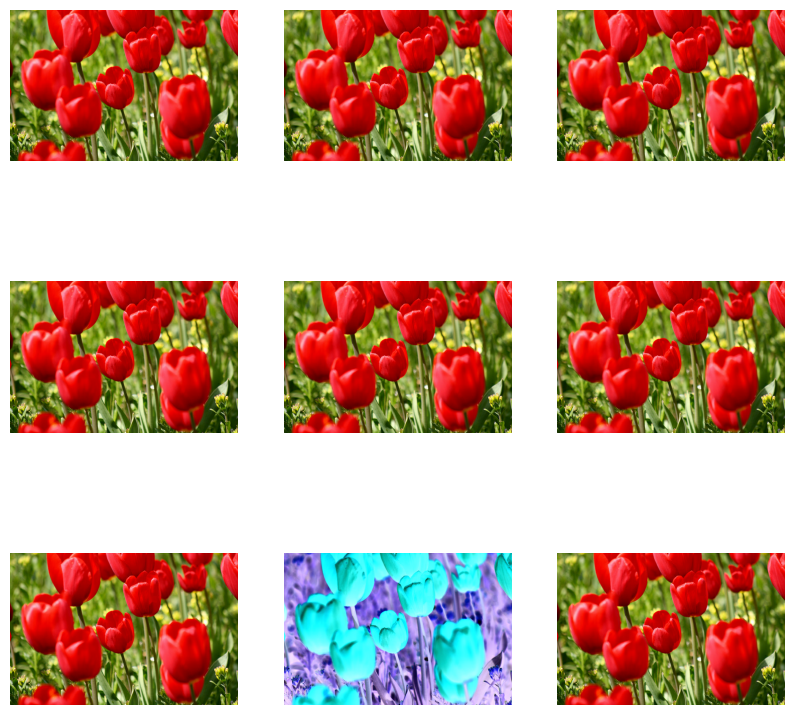

In [28]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = random_invert(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")

</br>

### 2. ÏÑúÎ∏åÌÅ¥ÎûòÏã±ÌïòÏó¨ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î†àÏù¥Ïñ¥ Íµ¨ÌòÑ

In [29]:
class RandomInvert(keras.layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return random_invert_img(x)

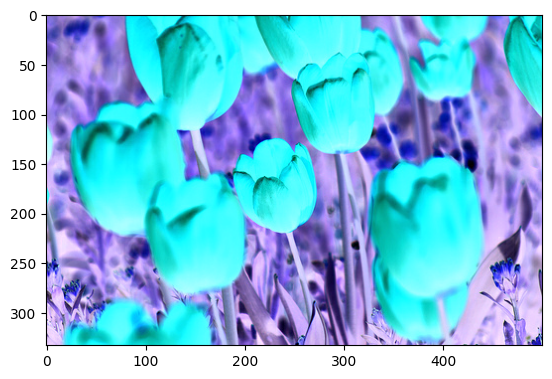

In [30]:
_ = plt.imshow(RandomInvert()(image)[0])

<br></br>

## - Î∞©Î≤ï4. tf.image ÏÇ¨Ïö©

- ÏúÑÏùò Keras Ï†ÑÏ≤òÎ¶¨ Ïú†Ìã∏Î¶¨Ìã∞Îäî Ìé∏Î¶¨ÌïòÏßÄÎßå,

- Îçî ÏÑ∏Î∞ÄÌïú Ï†úÏñ¥Î•º ÏúÑÌï¥ÏÑú `tf.data` Î∞è `tf.image`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûêÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÎòêÎäî Î†àÏù¥Ïñ¥Î•º ÏûëÏÑ±Ìï† Ïàò ÏûàÎã§.

- [TensorFlow Ï∂îÍ∞Ä Ïù¥ÎØ∏ÏßÄ: ÏûëÏóÖ](https://www.tensorflow.org/addons/tutorials/image_ops) Î∞è [TensorFlow I/O: ÏÉâ Í≥µÍ∞Ñ Î≥ÄÌôò](https://www.tensorflow.org/io/tutorials/colorspace)ÎèÑ ÏÇ¥Ìé¥Î≥¥Î©¥ Ï¢ãÎã§.

In [31]:
# ÍΩÉ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Îäî Ïù¥Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏóàÏúºÎØÄÎ°ú Îã§Ïãú Í∞ÄÏ†∏ÏôÄÏÑú ÏÉàÎ°ú ÏãúÏûë

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

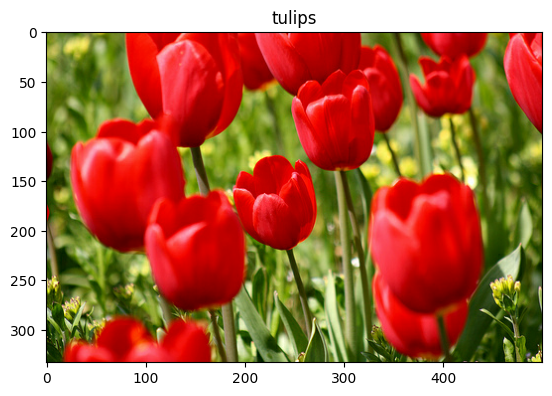

In [32]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [33]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ Ï¶ùÍ∞ï Ïù¥ÎØ∏ÏßÄÎ•º ÎÇòÎûÄÌûà ÏãúÍ∞ÅÌôîÌïòÍ≥† ÎπÑÍµêÌïòÎäî Ìï®Ïàò Ï†ïÏùò

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ Îí§ÏßëÍ∏∞

- `tf.image.flip_left_right`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏßÅ ÎòêÎäî ÏàòÌèâÏúºÎ°ú Îí§ÏßëÎäîÎã§.

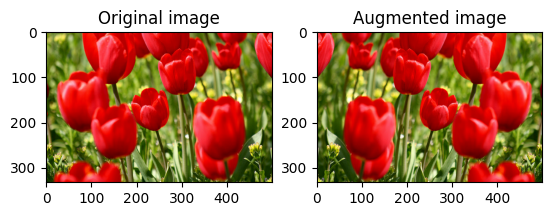

In [34]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº

- `tf.image.rgb_to_grayscale`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏Î†àÏù¥Ïä§ÏºÄÏùºÎ°ú ÎßåÎì§ Ïàò ÏûàÎã§.

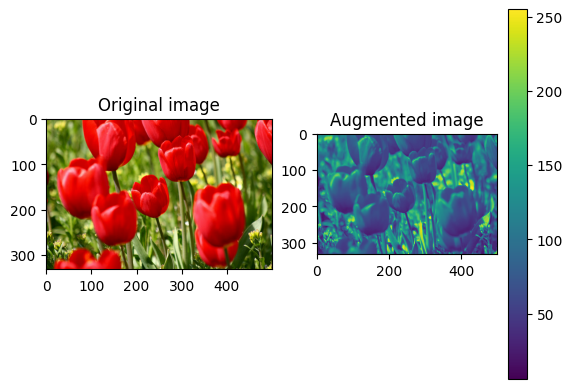

In [35]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ Ï±ÑÎèÑ Î≥ÄÌôî

- Ï±ÑÎèÑ Î≥ÄÌôîÎ•º Ïù¥Ïö©Ìïú Ï¶ùÍ∞ï

- Ï±ÑÎèÑ Í≥ÑÏàòÎ•º Ï†úÍ≥µÌïòÏó¨ `tf.image.adjust_saturation`ÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Ìè¨ÌôîÏãúÌÇ®Îã§.

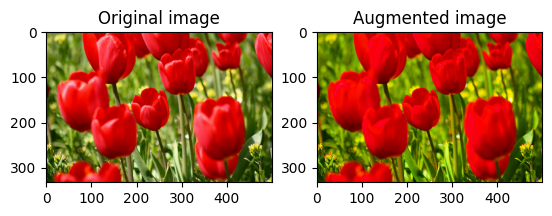

In [36]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞ Î≥ÄÌôî

- Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞Î•º Î≥ÄÍ≤ΩÌïòÏó¨ Ï¶ùÍ∞ï

- Î∞ùÍ∏∞ Í≥ÑÏàòÎ•º Ï†úÍ≥µÌïòÏó¨ `tf.image.adjust_brightness`Î°ú Ïù¥ÎØ∏ÏßÄÏùò Î∞ùÍ∏∞Î•º Î≥ÄÍ≤ΩÌïúÎã§.

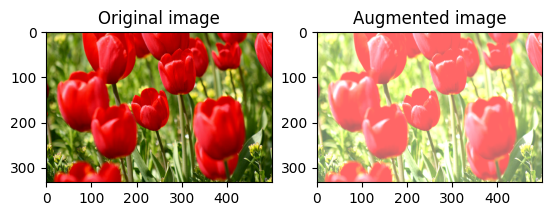

In [37]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ ÏûêÎ•¥Í∏∞

- `tf.image.central_crop`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï§ëÏïôÏóêÏÑú ÏõêÌïòÎäî Ïù¥ÎØ∏ÏßÄ Î∂ÄÎ∂ÑÍπåÏßÄ Ïù¥ÎØ∏ÏßÄÎ•º ÏûêÎ•∏Îã§.

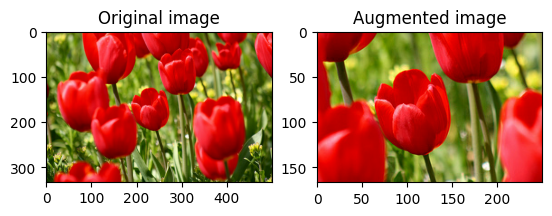

In [38]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

</br>

### ‚óæ Ïù¥ÎØ∏ÏßÄ ÌöåÏ†Ñ

- `tf.image.rot90`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º 90ÎèÑ ÌöåÏ†ÑÌïúÎã§.

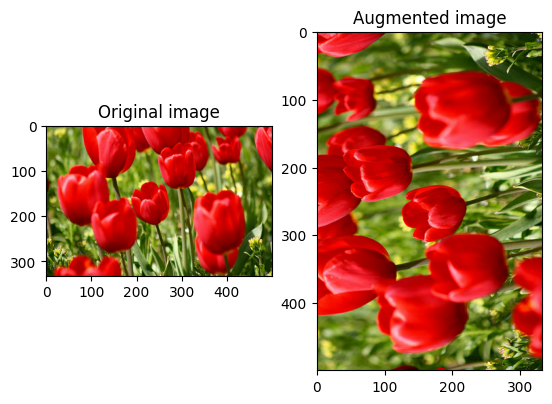

In [39]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

<br></br>

## - Ïù¥ÎØ∏ÏßÄ Î¨¥ÏûëÏúÑ Î≥ÄÌôò ÏòàÏ†ú

- `tf.image.stateless_random*`ÏùÑ ÏÇ¨Ïö©Ìï¥ Î¨¥ÏûëÏúÑÎ°ú Ïù¥ÎØ∏ÏßÄ Ïó∞ÏÇ∞

- Ïù¥ÎØ∏ÏßÄÏóê Î¨¥ÏûëÏúÑ Î≥ÄÌôòÏùÑ Ï†ÅÏö©ÌïòÎ©¥ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º ÏùºÎ∞òÌôîÌïòÍ≥† ÌôïÏû•ÌïòÍ∏∞Í∞Ä Îçî Ïö©Ïù¥Ìï† Ïàò ÏûàÎã§.

- ÌòÑÏû¨ `tf.image` APIÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ 8Í∞ÄÏßÄ Î¨¥ÏûëÏúÑ Ïù¥ÎØ∏ÏßÄ Ïó∞ÏÇ∞(ops)ÏùÑ Ï†úÍ≥µÌïúÎã§.

    - [`tf.image.stateless_random_brightness`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_brightness)
    - [`tf.image.stateless_random_contrast`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_contrast)
    - [`tf.image.stateless_random_crop`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_crop)
    - [`tf.image.stateless_random_flip_left_right`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_left_right)
    - [`tf.image.stateless_random_flip_up_down`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_up_down)
    - [`tf.image.stateless_random_hue`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_hue)
    - [`tf.image.stateless_random_jpeg_quality`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_jpeg_quality)
    - [`tf.image.stateless_random_saturation`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_saturation)

- Ïù¥Îü¨Ìïú Î¨¥ÏûëÏúÑ Ïù¥ÎØ∏ÏßÄ Ïó∞ÏÇ∞ÏùÄ ÏàúÏ†ÑÌûà Í∏∞Îä•Ï†ÅÏù¥Îã§.

    Ï∂úÎ†•ÏùÄ ÏûÖÎ†•ÏóêÎßå ÏùòÏ°¥ÌïúÎã§. </br>
    Îî∞ÎùºÏÑú Í≥†ÏÑ±Îä•Ïùò Í≤∞Ï†ïÎêú ÏûÖÎ†• ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏâΩÎã§. </br>
    Í∞Å Îã®Í≥ÑÎßàÎã§ `seed` Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ïïº ÌïúÎã§. ÎèôÏùºÌïú `seed`Í∞Ä Ï£ºÏñ¥ÏßÄÎ©¥ Ìò∏Ï∂ú ÌöüÏàòÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Î∞òÌôòÌïúÎã§.

    - Ï∞∏Í≥†: `seed`Îäî Í∞íÏù¥ Ï†ïÏàòÏù∏ ÌòïÏÉÅ `(2,)`Ïùò `Tensor`ÏûÖÎãàÎã§.

</br>

### Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï¶ùÍ∞ï Ï†ÅÏö©

- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïóê Î¨¥ÏûëÏúÑ Î≥ÄÌôòÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ ÏïåÏïÑÎ≥∏Îã§.

In [40]:
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [41]:
# Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Î∞è Ïä§ÏºÄÏùº Ï°∞Ï†ïÏùÑ ÏúÑÌïú Ïú†Ìã∏Î¶¨Ìã∞ Ìï®ÏàòÎ•º Ï†ïÏùò
# Ïù¥ Ìï®ÏàòÎäî Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏ÏóêÏÑú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ÏôÄ Ïä§ÏºÄÏùºÏùÑ ÌÜµÌï©ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêúÎã§.

def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

In [42]:
# Ïù¥ÎØ∏ÏßÄÏóê Î¨¥ÏûëÏúÑ Î≥ÄÌôòÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî augment Ìï®ÏàòÎèÑ Ï†ïÏùò

def augment(image_label, seed):
    image, label = image_label
    image, label = resize_and_rescale(image, label)

    # Add 6 pixels of padding
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)

    # Make a new seed.
    new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]

    # Random crop back to the original size.
    image = tf.image.stateless_random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)

    # Random brightness.
    image = tf.image.stateless_random_brightness(image, max_delta=0.5, seed=new_seed)

    image = tf.clip_by_value(image, 0, 1)
    return image, label

- tf.data.experimental.Counter ÏÇ¨Ïö©

    - `tf.data.experimental.Counter` Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥†(ÏïûÏúºÎ°ú `counter`ÎùºÍ≥† Î∂ÄÎ¶Ñ) `(counter, counter)`Î°ú Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º `Dataset.zip` Ï≤òÎ¶¨ÌïúÎã§.
    
    - Í∑∏Îü¨Î©¥ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïùò Í∞Å Ïù¥ÎØ∏ÏßÄÍ∞Ä `counter`Î•º Í∏∞Î∞òÏúºÎ°ú ÌòïÏÉÅ `(2,)`Ïùò Í≥†Ïú†Ìïú Í∞íÍ≥º Ïó∞Í≤∞ÎêòÍ≥† ÎÇòÏ§ëÏóê Î¨¥ÏûëÏúÑ Î≥ÄÌôòÏùÑ ÏúÑÌïú `seed` Í∞íÏúºÎ°ú `augment` Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï† Ïàò ÏûàÎã§.

In [43]:
# Create a `Counter` object and `Dataset.zip` it together with the training set.
# counter = tf.data.experimental.Counter()
counter = tf.data.Dataset.counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

In [44]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
# train_dsÎäî augment Ìï®ÏàòÎ•º Îß§ÌïëÌïòÍ≥†,
# val, test datasetÏùÄ resize_and_rescale Ìï®ÏàòÎ°ú Îß§ÌïëÌïúÎã§.

train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)